# Исследование работы сервиса продажи компьютерных игр

Итернет-магазин Стримчик, продаёт по всему миру компьютерные игры. 

**Цель:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**План работы.**  
1. Загрузить данные и изучить общую информацию.
2. Подготовить данные    
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Выдвинуть и проверить гипотезы
6. Сформулировать общий вывод.

**Описание данных.**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица с данными содержит 16715 строк и 11 столбцов. 6 столбцов имеют тип данных `float`, 5 столбцов - `object`. Имеются пропущенные значения. Названия столбцов требуют перевода в нижний регистр.

## Подготовка данных
### Приведение названий столбцов к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

В столбце `year_of_release` необходимо поменять тип на `int`, так как тип `float` не подходит для обозначения года выпуска. Тип `date` также не подходит, так как известен только год, а данных о дне и месяце нет.

In [4]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим уникальные значения пользваотельских оценок

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` встречается аббревиатура `tbd`. Это означает `подлежит определению`, то есть значение отсутствует. Удалим это значение в столбце, то есть заменим на `NaN`.

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')
data['critic_score'] = data['critic_score'].astype('Int64')
display(data.head(10))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

По классификации ESRB рейтинги игр основаны на их содержании и имеют следующие обозначения:

- `EC` - для детей младшего возраста (с 3 лет);
- `E` - для всех;
- `E10+` - для всех от 10 лет и старше;
- `T` - подросткам;
- `M` - для взрослых;
- `AO` - только для взрослых;
- `RP` - рейтинг ожидается.

Пропуски в столбце `rating` могли появиться из-за того, что производитель мог не указать его на упаковке, либо при работе с данными некоторые значения могли быть утеряны. Заполним пропуски в этом столбце значением `RP`.

In [7]:
data['rating'] = data['rating'].fillna(value='RP')

Пропуски в столбцах `user_score` и `critic_score` могут быть из-за отсутствия данных по оценкам. Пропуски в столбце `year_of_release` могли появиться из-за технической ошибки. Заполнить пропуски средним или каким-либо другим значением мы не можем, так как оценки и рейтинги имеют принципиальное значение, а год выпуска - это неотъемлемая характеристика продукта. Удалить строки с пропусками тоже жалко, так как пропусков очень много.

##### Обработка дубликатов

In [8]:
data.duplicated().sum()

0

Явных дубликатов нет.

Проверим на неявные дубликаты

In [9]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
print('Количество неявных дубликатов', data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum())
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

Количество неявных дубликатов 2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,gen,1993,NaN,0.0,0.00,0.03,0.0,<NA>,NaN,RP
16230,madden nfl 13,ps3,2012,Sports,0.0,0.01,0.00,0.0,83,5.5,E


Эти строки ценности не представляют, так как значения продаж в них небольшие. Удалим эти строки.

In [10]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

### Добавление столбца суммарных продаж

In [11]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP,31.38
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,RP,30.26
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,RP,28.31


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


**Вывод.** Названия колонок приведены в `змеиный регистр`, оценки критиков и пользователей приведены к сопоставимому виду, типы данных изменены на целочисленные в столбцах `year_of_release`, `critic_score` и `user_score`, пропущенные значения удалены только в столбцах `name` и `genre`, в столбце `rating` пропущенные значения заменены на константу, в других столбцах пропущенные значения оставлены.

## Исследовательский анализ данных
### Количество игр, выпущенных в разные годы

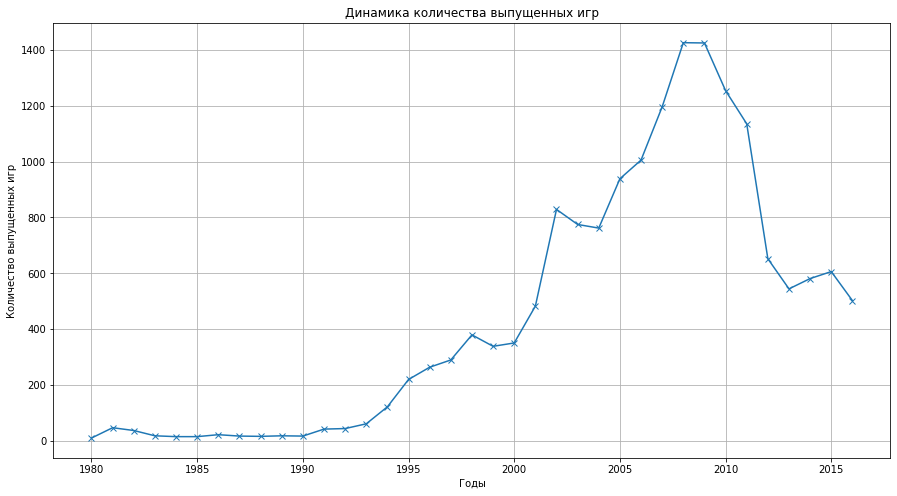

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(data.groupby('year_of_release')['name'].count(), marker='x')
plt.title('Динамика количества выпущенных игр')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр')
plt.grid(True)
plt.show()

Как видно из графика, до 1995 года выпускалось мало игр, в 1995 году их количество достигло 200, а, начиная с 2000 года, наблюдается резкое увеличение выпуска игр вплоть до 2009 года, а после 2010 года можно увидеть тенденцию снижения производства игр. В нашем исследовании данные до 1995 года не важны по двум причинам: небольшого их количества и отдалённостью временного периода.

In [14]:
data_new = data.query('year_of_release >= 1995')
display(data_new.head())
data_new.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP,31.38
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15957 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15957 non-null  object 
 1   platform         15957 non-null  object 
 2   year_of_release  15957 non-null  Int64  
 3   genre            15957 non-null  object 
 4   na_sales         15957 non-null  float64
 5   eu_sales         15957 non-null  float64
 6   jp_sales         15957 non-null  float64
 7   other_sales      15957 non-null  float64
 8   critic_score     7978 non-null   Int64  
 9   user_score       7458 non-null   float64
 10  rating           15957 non-null  object 
 11  total_sales      15957 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


### Изменение продаж по платформам

Сгруппируем данные по платформам, посчитаем для них суммарные продажи\
Выведем 5 платформ с наибольшыми суммарными продажами

In [15]:
sort_platforms = data_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
good_platforms = sort_platforms.head()
good_platforms

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.76
Name: total_sales, dtype: float64

Сделаем срез из датафрейма `data` по платформам с наибольшими суммарными продажами

In [16]:
good_platform_data = data_new.query('platform in @good_platforms.index')
display(good_platform_data.head())
display(len(good_platform_data))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


8070

Построим график, на котором представим общие продажи по годам и по платформам с наибольшими суммарными продажами

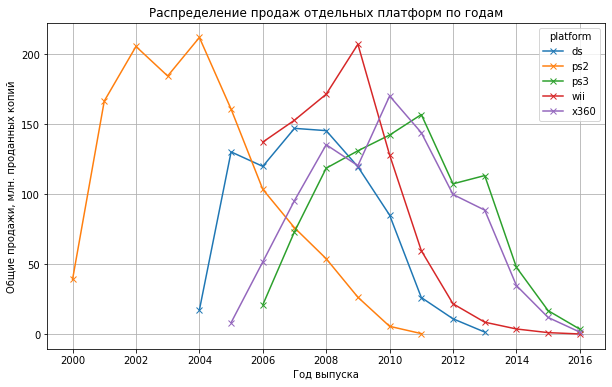

In [17]:
good_platform_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    title='Распределение продаж отдельных платформ по годам',
    xlabel='Год выпуска',
    ylabel='Общие продажи, млн. проданных копий',
    style='x-',
    figsize=(10, 6),
    grid=True
)
plt.show()


На графике видно, что характерный срок, за который появляются и исчезают платформы, составляет примерно 10 лет. Первые 4-5 лет продажи новых платформ держатся на высоком уровне, затем постепенно снижаются, и примерно на 10-й год они опускаются практически до нуля.

### Выбор потенциально прибыльных платформ

Выберем актуальный период с 2014 по 2016 годы, так как в такой динамично меняющейся индустрии, как компьютерные игры, для целей прогнозирования нельзя брать большой временной интервал, чтобы не захватить уже отжившие тренды. Выберем данные за этот период.

In [18]:
data_actual = data.query('year_of_release >= 2014')
data_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,14.63
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,RP,11.68
77,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,RP,7.98
92,call of duty: advanced warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,ps4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,super smash bros. for wii u and 3ds,3ds,2014,Fighting,3.27,1.37,2.43,0.48,<NA>,NaN,RP,7.55
99,call of duty: black ops 3,xone,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,RP,7.39
105,fallout 4,ps4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


In [19]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


In [20]:
data_actual_pivot = data_actual.pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'
).sort_values(by=2016, ascending=False)

data_actual_pivot

year_of_release,2014,2015,2016
platform,,,
ps4,100.00,118.90,69.25
xone,54.07,60.14,26.15
3ds,43.76,27.78,15.14
pc,13.28,8.52,5.25
wiiu,22.03,16.35,4.60
psv,11.90,6.25,4.25
ps3,47.76,16.82,3.60
x360,34.74,11.96,1.52
wii,3.75,1.14,0.18


Построим график, на котором представим общие продажи по годам и по платформам с наибольшими суммарными продажами

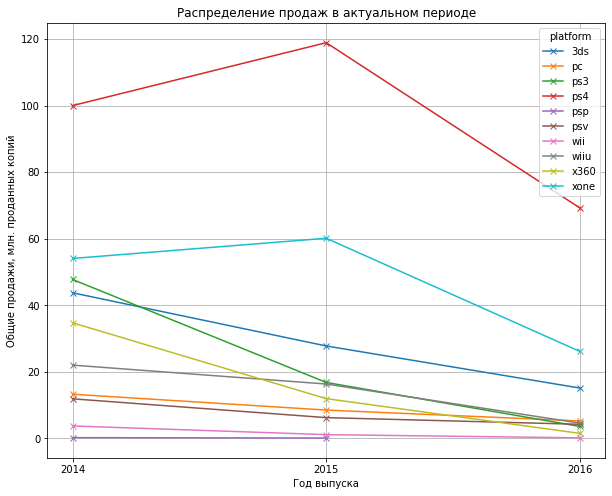

In [21]:
data_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    title='Распределение продаж в актуальном периоде',
    xlabel='Год выпуска',
    ylabel='Общие продажи, млн. проданных копий',
    style='x-',
    figsize=(10, 8),
    grid=True
)
plt.xticks(ticks=[2014, 2015, 2016])
plt.show()

Выберем первые 3 платформы из таблицы `data_actual_pivot`, это потенциально прибыльные платформы.

In [22]:
data_potential = data_actual_pivot.loc[:'3ds']
data_potential

year_of_release,2014,2015,2016
platform,,,
ps4,100.00,118.90,69.25
xone,54.07,60.14,26.15
3ds,43.76,27.78,15.14


### Разброс глобальных продаж игр по платформам

Построим `ящик с усами` по глобальным продажам игр в разбивке по платформам за актуальный период с 2014 по 2016 годы по таблице `data_actual`.

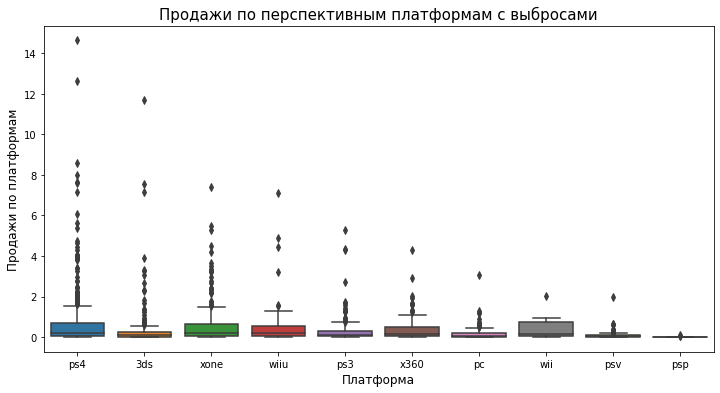

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)
plt.show();

На диаграмме размаха видно, что среди платформ есть `звёзды`, которые приносят максимум выручки: `PS4`, `3DS`, `XOne`, `WiiU`, `PS3`, эти платформы способны выпускать наиболее привлекательные для игроманов игры. Рассмотрим более подробно нижнюю часть графика.

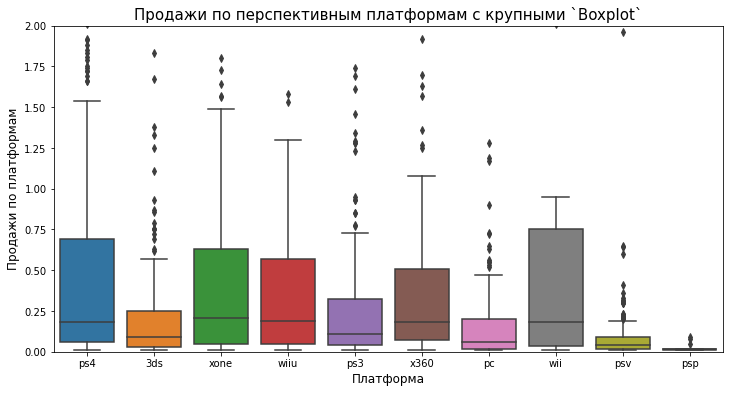

In [24]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_actual, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам с крупными `Boxplot`', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)
plt.show();

На нижней части диаграммы размаха видно, что не только у платформ `PS4`, `PS3`, `3DS`, `XOne`, `WiiU` имеются хорошие выбросы в большую сторону, но и платформа `X360` выглядит очень привлекательно в плане прибыльности. Кроме того, платформа `PC` подтверждает свой статус устойчивого и стабильного источника прибыли в игровой сфере.  

У платформ `PS4`, `Wii`, `WiiU`, `X360`, `XOne` очень хороши медианные значения, то есть средние продаже на этих платформах выше, чем у остальных.

Платформа `PSP` показывает совсем маленькие результаты продаж; `PSV`, хоть и имеет выбросы, но эти выбросы меньше, чем у некоторых платформ третий квартиль, и медианное значение очень маленькое; `Wii`, хоть и большой межквартильный размах, но выбросов нет, значений, превышающих третий квартиль очень мало.  

Итак, диаграмма размаха подтверждает рекомендации платформ: `PS4`, `3DS`, `XOne`, `WiiU`, `PS3`, `X360`.

### Влияние отзывов на продажи внутри платформы

Выберем из датафрейма с данными за актуальный период `data_actual` данные по  конкурирующим платформам `PS4`, `PC`, `PS3`, `Xone` и изучим влияние отзывов на продажи внутри этих платформ. Сделаем два среза из датафрейма `data_actual`, выбрав данные только по этим платформам.
Создадим функцию анализа платформ

In [25]:
def f_analyz_platform(data_actual, platform):
    # Выделение данных по заданной платформе
    data = data_actual.query(f'platform == "{platform}"')
    
    # Просмотр первых строк и информации о данных
    print(f"Данные по платформе {platform}:")
    display(data.head())
    data.info()
    
    # Анализ связи между отзывами пользователей и продажами
    data.plot(
        title=f'Диаграмма рассеяния между оценками пользователей и продажами для {platform}',
        x='user_score',
        xlabel='оценка пользователей',
        y='total_sales',
        ylabel='суммарные продажи',
        kind='scatter',
        figsize=(8, 6)
    )
    plt.show()
    
    # Анализ связи между отзывами критиков и продажами
    data.plot(
        title=f'Диаграмма рассеяния между оценками критиков и продажами для {platform}',
        x='critic_score',
        xlabel='оценка критиков',
        y='total_sales',
        ylabel='суммарные продажи',
        kind='scatter',
        figsize=(8, 6)
    )
    plt.show()
    
    # Расчет коэффициента корреляции Пирсона
    print(f'Коэффициенты корреляции Пирсона для платформы "{platform}"')
    display(data[['user_score', 'critic_score', 'total_sales']].corr().round(2))
    
    # Вывод средней оценки критиков для заданной платформы
    score_platform = data_actual.groupby('platform')['critic_score'].mean().sort_values(ascending=False)
    print(f'Средняя оценка критиков для платформы {platform}: {score_platform[platform]}')

**Анализ платформы `ps3`**

Данные по платформе ps3:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,minecraft,ps3,2014,Misc,2.03,2.37,0.00,0.87,<NA>,NaN,RP,5.27
255,call of duty: advanced warfare,ps3,2014,Shooter,1.56,1.93,0.19,0.68,<NA>,4.8,M,4.36
264,fifa 15,ps3,2014,Sports,0.58,3.02,0.04,0.64,<NA>,4.5,E,4.28
552,fifa 16,ps3,2015,Sports,0.41,1.84,0.05,0.40,<NA>,3.2,E,2.70
1021,watch dogs,ps3,2014,Action,0.56,0.81,0.10,0.27,<NA>,5.1,M,1.74


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 180 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             219 non-null    object 
 1   platform         219 non-null    object 
 2   year_of_release  219 non-null    Int64  
 3   genre            219 non-null    object 
 4   na_sales         219 non-null    float64
 5   eu_sales         219 non-null    float64
 6   jp_sales         219 non-null    float64
 7   other_sales      219 non-null    float64
 8   critic_score     36 non-null     Int64  
 9   user_score       98 non-null     float64
 10  rating           219 non-null    object 
 11  total_sales      219 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 22.7+ KB


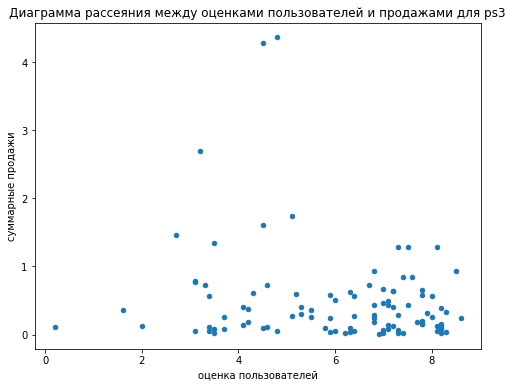

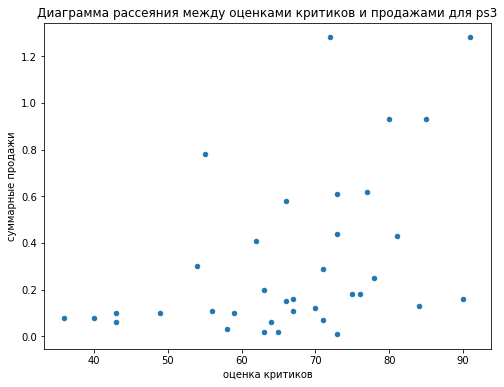

Коэффициенты корреляции Пирсона для платформы "ps3"


,user_score,critic_score,total_sales
user_score,1.00,0.69,-0.17
critic_score,0.69,1.00,0.45
total_sales,-0.17,0.45,1.00


Средняя оценка критиков для платформы ps3: 66.55555555555556


In [26]:
f_analyz_platform(data_actual, 'ps3')

**Анализ платформы `xone`**

Данные по платформе xone:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,call of duty: black ops 3,xone,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,RP,7.39
165,grand theft auto v,xone,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,call of duty: advanced warfare,xone,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,halo 5: guardians,xone,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,fallout 4,xone,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22


<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    Int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     155 non-null    Int64  
 9   user_score       165 non-null    float64
 10  rating           228 non-null    object 
 11  total_sales      228 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 23.6+ KB


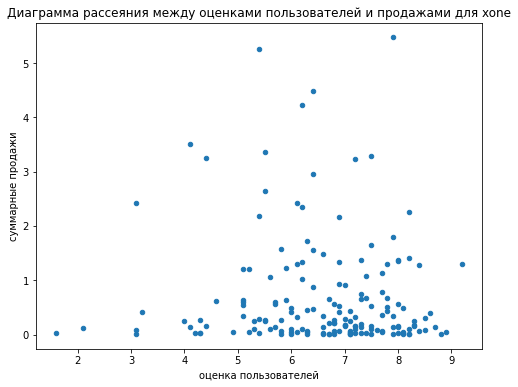

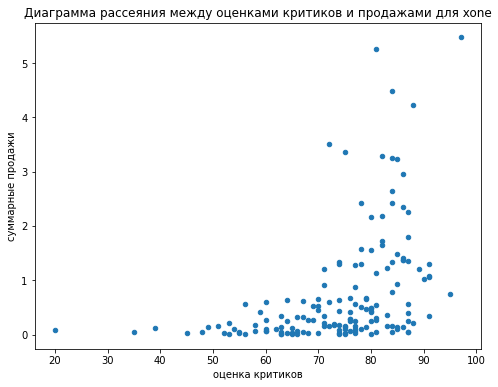

Коэффициенты корреляции Пирсона для платформы "xone"


,user_score,critic_score,total_sales
user_score,1.00,0.44,-0.07
critic_score,0.44,1.00,0.43
total_sales,-0.07,0.43,1.00


Средняя оценка критиков для платформы xone: 73.79354838709678


In [27]:
f_analyz_platform(data_actual, 'xone')

**Анализ платформы `ps4`**

Данные по платформе ps4:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,14.63
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,RP,7.98
92,call of duty: advanced warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    Int64  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   critic_score     237 non-null    Int64  
 9   user_score       242 non-null    float64
 10  rating           376 non-null    object 
 11  total_sales      376 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 38.9+ KB


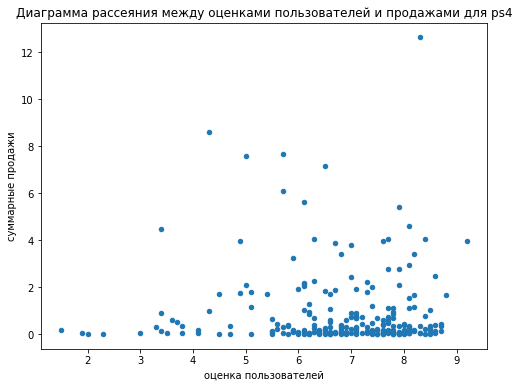

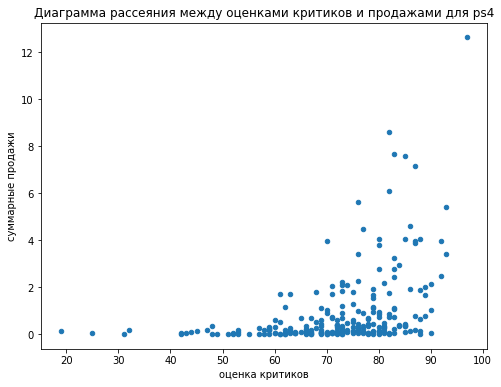

Коэффициенты корреляции Пирсона для платформы "ps4"


,user_score,critic_score,total_sales
user_score,1.00,0.55,-0.04
critic_score,0.55,1.00,0.40
total_sales,-0.04,0.40,1.00


Средняя оценка критиков для платформы ps4: 72.16455696202532


In [28]:
f_analyz_platform(data_actual, 'ps4')

**Анализ платформы `pc`**

Данные по платформе pc:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,the sims 4,pc,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1530,fallout 4,pc,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
1677,farming simulator 2015,pc,2014,Simulation,0.08,1.04,0.0,0.07,<NA>,NaN,RP,1.19
1730,grand theft auto v,pc,2015,Action,0.39,0.69,0.0,0.09,96,7.9,M,1.17
2303,the elder scrolls online,pc,2014,Role-Playing,0.32,0.51,0.0,0.07,71,5.7,M,0.90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             151 non-null    object 
 1   platform         151 non-null    object 
 2   year_of_release  151 non-null    Int64  
 3   genre            151 non-null    object 
 4   na_sales         151 non-null    float64
 5   eu_sales         151 non-null    float64
 6   jp_sales         151 non-null    float64
 7   other_sales      151 non-null    float64
 8   critic_score     116 non-null    Int64  
 9   user_score       122 non-null    float64
 10  rating           151 non-null    object 
 11  total_sales      151 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 15.6+ KB


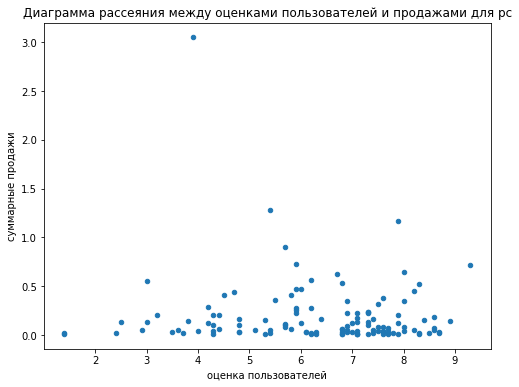

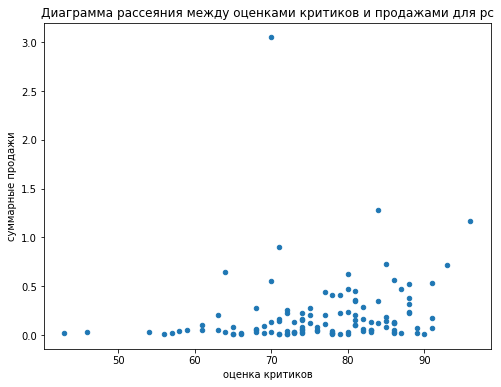

Коэффициенты корреляции Пирсона для платформы "pc"


,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.17
total_sales,-0.07,0.17,1.00


Средняя оценка критиков для платформы pc: 76.21551724137932


In [29]:
f_analyz_platform(data_actual, 'pc')

Рассчитанные коэффициенты корреляции показывают, что между оценками пользователей и продажами игр внутри отдельных платформ зависимость практически отсутствует, а между оценками критиков и продажами имеется слабая прямая зависимость. Оценки критиков и пользователей имеют прямую взаимосвязь средней силы.
Так как большее значение для продаж имеют именно оценки критиков, рассмотрим, каковы средние оценки критиков на других платформах.

In [30]:
score_platform = data_actual.groupby('platform')['critic_score'].mean().sort_values(ascending=False)
score_platform

platform
pc      76.215517
xone    73.793548
psv     72.259259
ps4     72.164557
wiiu    71.186047
3ds     68.980392
ps3     66.555556
x360    63.730769
psp          <NA>
wii          <NA>
Name: critic_score, dtype: Float64

Судя по оценкам критиков, наиболее перспективными платформами являются (исключая закончившие свой жизненный цикл) `PC`, `XOne`, `PS4`, `WiiU`, `PSV`, `PS3`. У платформы `3DS` средняя оценка заметно ниже, хоть она отмечена нами как имеющая потенциал.

### Распределение игр по жанрам

Сгруппируем по данным таблицы `data_actual` игры по жанрам, посчитаем общие продажи по жанрам

In [31]:
data_genre_grouped = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
data_genre_grouped

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Рассмотрим числовые характеристики распределения продаж по жанрам

In [32]:
data_genre_grouped.describe().round(2)

count     12.00
mean      60.79
std       67.88
min        2.21
25%       16.45
50%       27.87
75%      103.45
max      199.36
Name: total_sales, dtype: float64

Как видно из числовых характеристик, распределение продаж по жанрам несимметричное. Среднее значение составляет 60,79 миллионов копий, а вот медианное сильно отличается - 27,87 миллионов. При этом стандартное отклонение 67,88, то есть очень большой разброс значений. Половина платформ имеет суммарные продажи в пределах от 16,45 до 103,45 миллионов копий, а максимальное значение составляет почти 200 миллионов копий.

Построим `ящик с усами` по глобальным продажам игр в разбивке по платформам за актуальный период с 2014 по 2016 годы по таблице `data_actual`.

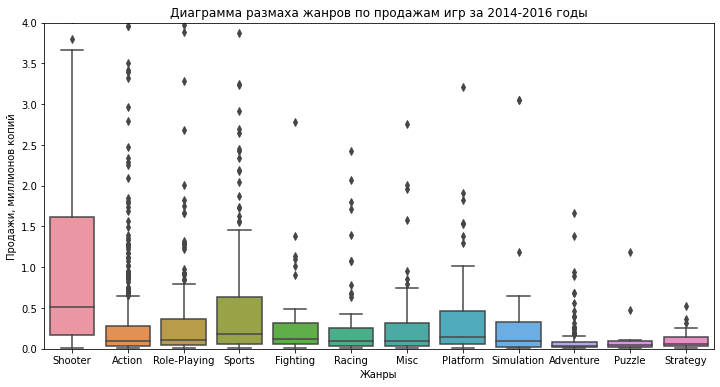

In [33]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_actual, x='genre', y='total_sales')
ax.set(ylim=(0,4))
plt.title('Диаграмма размаха жанров по продажам игр за 2014-2016 годы')
plt.ylabel('Продажи, миллионов копий')
plt.xlabel('Жанры')
plt.show()

На диаграмме размаха видно, что в нескольких жанрах есть много аномально больших значений продаж, это лидеры среди жанров, приносящие хорошую выручку: `Action`, `Shooter`, `Role-Playing`, `Sports`. Рассмотрим более подробно нижнюю часть графика.

Как видно из полученной диаграммы размаха, жанр `Action` показывает самое большое количество аномально больших продаж. Жанр `Shooter` имеет самое большое медианное значение, самый большой межквартильный размах и самый большой "ус" вправо на графике, то есть наиболее длинный ряд успешно продающихся игр. Достаточно большой стабильностью отличается и жанр `Sports`, также имеющий довольно большие медиану, межквартильный размах и правый ус. Неплохие коробочки у жанров `Platform` и `Simulation`.  
А вот жанры `Puzzle` и `Strategy` выглядят весьма скромно, коробочки у них небольшие и выбросов почти нет. Ставку на эти жанры делать не стоит.

**Вывод.** До 1995 года игр выпускалось мало, интерес для исследования представляет период с 1995 года.  
Характерный срок, за который появляются и исчезают платформы, составляет примерно 10 лет. Первые 4-5 лет продажи новых платформ держатся на высоком уровне, затем постепенно снижаются, и примерно на 10-й год они опускаются практически до нуля.  
На основании распределения продаж по годам с 2014 по 2016 гг. потенциально прибыльными платформами можно считать `PS4`, `XOne`, `3DS`, `PC`, `WiiU`, `PSV`.  
Отзывы пользователей не оказывают влияния на глобальные продажи игр, а между отзывами критиков и продажами игр отмечено присутствие прямой зависимости, хоть и слабой.  
Судя по оценкам критиков, выбранные нами платформы, действительно, являются перспективными.  
Распределение продаж по жанрам несимметричное. Самые прибыльные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Platform`, `Simulation`.

## Портрет пользователя каждого региона
### Самые популярные платформы

Выберем данные для каждого региона и сгруппируем их по платформам, посчитав суммарное число проданных копий в каждой группе.

In [34]:
data_region_platform = data_actual.pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum'
)
data_region_platform

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3ds,16.12,44.24,22.64,3.68
pc,17.97,0.00,7.23,1.85
ps3,25.54,11.22,22.05,9.37
ps4,130.04,15.02,98.61,44.48
psp,0.00,0.36,0.00,0.00
psv,3.53,14.54,2.52,1.81
wii,2.59,0.00,2.08,0.40
wiiu,13.15,7.31,19.36,3.16
x360,15.49,0.08,28.30,4.35


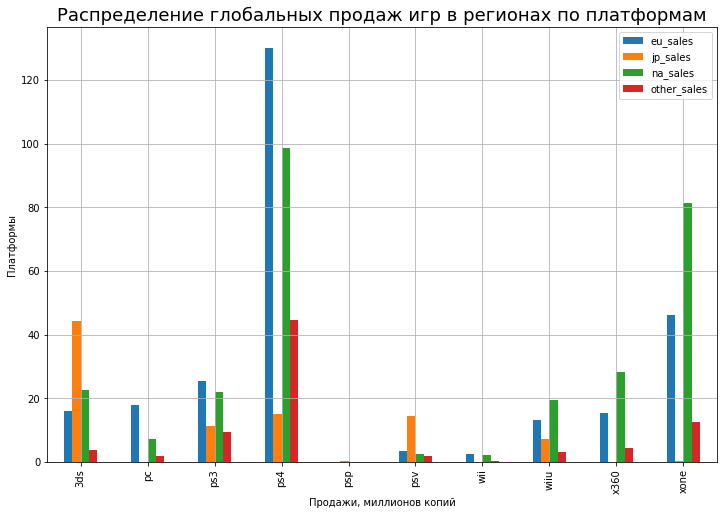

In [35]:
data_region_platform.plot.bar(figsize=(12, 8))
plt.title('Распределение глобальных продаж игр в регионах по платформам', fontsize=18)
plt.xlabel('Продажи, миллионов копий')
plt.ylabel('Платформы')
plt.grid()
plt.show()

На диаграмме можно увидеть, что в разных регионах пользователи предпочитают разные платформы. Так, в Северной Америке самой востребованной платформой является `X360`, в Японии - `3DS`, в Европе и в других регионах - `PS3`. Для каждого региона выберем 5 самых популярных платформ и на данных по этим платформам построим круговые диаграммы, чтобы выяснить, какую долю каждая платформа занимает в топ-5 платформ по этому региону.

По каждому региону выберем 5 самых популярных платформ, остальные платформы в сумме обозначим как `other`. По этим данным построим круговые диаграммы, чтобы выяснить, какую долю каждая платформа занимает в продажах по этому региону.

In [36]:
# Функция для определения топ-5 и суммирования остальных продаж
def top_platform(region):
    top = data_region_platform[region].sort_values(ascending=False).head()
    other = 0
    for i in data_region_platform.index:
        if i not in top:
            other += data_region_platform.loc[i, region]
    top.loc['other'] = other
    return top

top_platform('eu_sales')

platform
ps4      130.04
xone      46.25
ps3       25.54
pc        17.97
3ds       16.12
other     34.76
Name: eu_sales, dtype: float64

Построим три круговые диаграммы

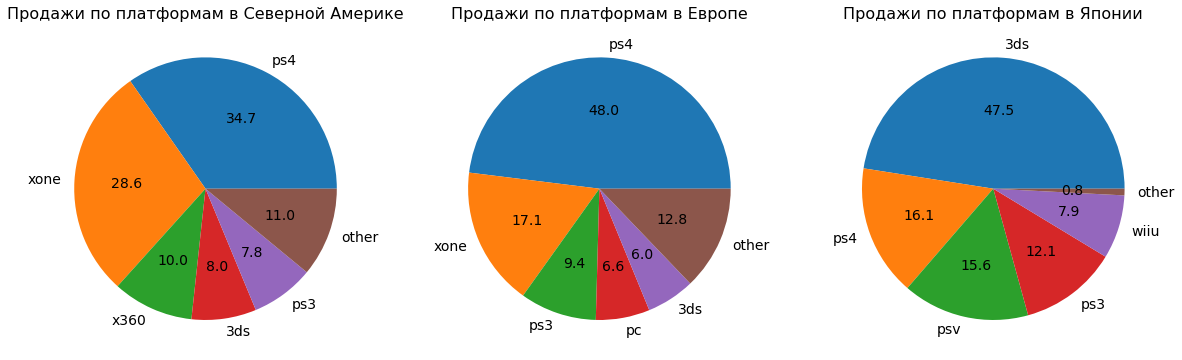

In [37]:
plt.subplot(131)
top_platform('na_sales').plot.pie(autopct='%.1f', figsize=(20, 20), fontsize=14)
plt.title('Продажи по платформам в Северной Америке', fontsize=16)                      
plt.ylabel('')
plt.subplot(132)
top_platform('eu_sales').plot.pie(autopct='%.1f', fontsize=14)
plt.title('Продажи по платформам в Европе', fontsize=16)
plt.ylabel('')
plt.subplot(133)
top_platform('jp_sales').plot.pie(autopct='%.1f', fontsize=14)
plt.title('Продажи по платформам в Японии', fontsize=16)
plt.ylabel('')
plt.show()

Состав топ-5 платформ в разных регионах различается.  
В Северной Америке и в Европе первое место по продажам занимает платформа `PS4`, в Европе её доля почти 50 %. Такую по размеру долю в Японии занимает платформа `3DS`, а `PS4` находится на втором месте по продажам.  
Второе место в Северной Америке и Европе занимает платформа `XOne`. На все остальные платформы в Северной Америке и Европе остаётся лишь треть общего объема продаж. В Северной Америке третье место с результатом 10 % занимает платформа `X360`, Четвертое и пятое места делят `3DS` и `PS3`.  
В Евроме платформа `PS3` пока остаётся на третьем месте, четвёртое место занимает традиционная `PC`, и на пятом месте `3DS`.  
В Японии на третьем месте `PSV`, на четвёртом `PS3` и на пятом `WiiU`.  
Другие платформы в Америке составляют 11 % рынка, в Европе = 13 %, а в Японии - менее 1 %, то есть в Японии хорошо продаются игры только пяти платформ.

Таким образом платформа `PS4` является самой популярной в мире, хотя в Японии она и не на первом месте; `3DS` также в топ-5 во всём мире, а в Японии её доля составляет почти половину рынка; `PS3` по-прежнему популярна во всём мире, удерживается в топ-5 во всех регионах. На платформы `XOne`, `X360`, `PC`, `PSV`, `WiiU` также можно рассчитывать в плане прибыльности.

### Самые популярные жанры

Выберем данные для каждого региона и сгруппируем их по жанрам, посчитав суммарное число проданных копий в каждой группе.

In [38]:
data_region_genre = data_actual.pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum'
)
data_region_genre

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.68,29.58,72.53,22.57
Adventure,6.49,3.60,5.64,1.82
Fighting,6.69,6.37,12.43,2.73
Misc,12.86,5.61,15.05,4.03
Platform,6.80,2.69,6.79,1.81
Puzzle,0.52,0.93,0.65,0.11
Racing,14.13,1.76,8.74,2.89
Role-Playing,28.17,31.16,33.47,8.64
Shooter,65.52,4.87,79.02,21.53


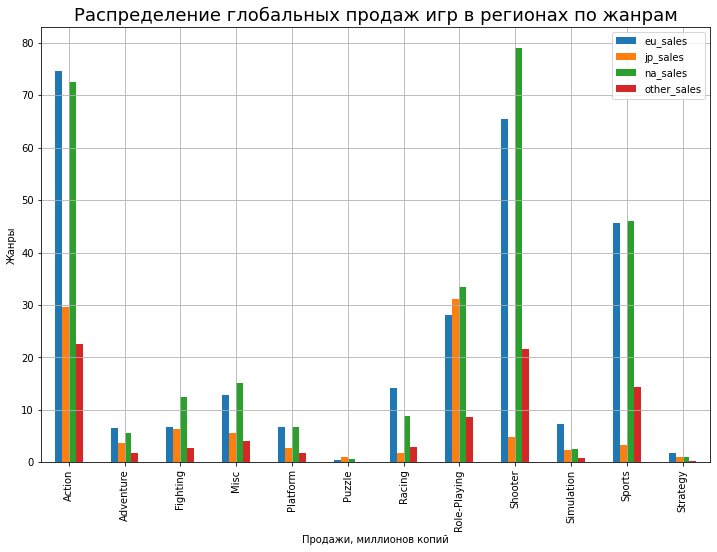

In [39]:
data_region_genre.plot.bar(figsize=(12, 8))
plt.title('Распределение глобальных продаж игр в регионах по жанрам', fontsize=18)
plt.xlabel('Продажи, миллионов копий')
plt.ylabel('Жанры')
plt.grid()
plt.show()

Первые результаты: в Японии на первом месте по продажам жанр `Role-Playing`, а во всех остальных регионах жанр `Action`. Посмотрим на состав топ-5 жанров более подробно. Для каждого региона выберем 5 самых популярных жанров и на данных по этим жанрам построим круговые диаграммы.

In [40]:
data_region_genre

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.68,29.58,72.53,22.57
Adventure,6.49,3.60,5.64,1.82
Fighting,6.69,6.37,12.43,2.73
Misc,12.86,5.61,15.05,4.03
Platform,6.80,2.69,6.79,1.81
Puzzle,0.52,0.93,0.65,0.11
Racing,14.13,1.76,8.74,2.89
Role-Playing,28.17,31.16,33.47,8.64
Shooter,65.52,4.87,79.02,21.53


In [41]:
# Функция для определения топ-5 и суммирования остальных продаж
def top_genre(region):
    top = data_region_genre[region].sort_values(ascending=False).head()
    other = 0
    for i in data_region_genre.index:
        if i not in top:
            other += data_region_genre.loc[i, region]
    top.loc['other'] = other
    return top

top_genre('eu_sales')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
other           42.45
Name: eu_sales, dtype: float64

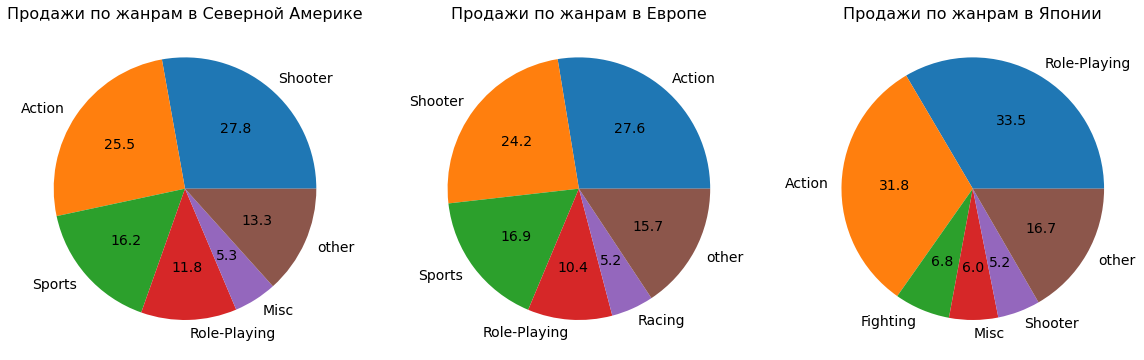

In [42]:
plt.subplot(131)
top_genre('na_sales').plot.pie(autopct='%.1f', figsize=(20, 20), fontsize=14)
plt.title('Продажи по жанрам в Северной Америке', fontsize=16)                      
plt.ylabel('')
plt.subplot(132)
top_genre('eu_sales').plot.pie(autopct='%.1f', fontsize=14)
plt.title('Продажи по жанрам в Европе', fontsize=16)
plt.ylabel('')
plt.subplot(133)
top_genre('jp_sales').plot.pie(autopct='%.1f', fontsize=14)
plt.title('Продажи по жанрам в Японии', fontsize=16)
plt.ylabel('')
plt.show()

В Северной Америке первое место по объему продаж занимают игры жанра `Sooter`, второе - `Action`, в Европе - наоборот, первое место занимает `Action`, второе - `Shooter`. Разница между величиной доли первого и второго по продажам жанра невелика. Можно считать, что первые два по популярности жанра в Европе и Америке одинаковы. Третий и четвертый по популярности жанры в Европе и Америке практически идентичны: `Sports` и `Role-Playing`. И только пятый по популярности жанр в этих регионах разный: в Северной Америке на пятом месте находится `Misc`, а в Европе - `Racing`.  
В Японии распределение жанров сильно отличается. Треть рынка игр занимают игры в жанре `Role-Playing`, на втором месте, тоже почти треть - `Action`, следующие три жанра - `Fighting`, `Misc`, `Shooter`. На остальные жанры приходится 16,7 % рынка. 

Итак, `Action` - самый популярный жанр в мире, он и `Shooter`, `Role-Playing`, `Sports` - основные жанры, на которые нужно делать акцент в формировании ассортимента игр. Кроме того, необходимо присутствие таких жанров как `Misc`, `Racing`, `Fighting`.

### Влияние рейтинга ESRB на продажи

In [43]:
data_actual['rating'].unique()

array(['RP', 'M', 'E', 'T', 'E10+'], dtype=object)

Напомним, что по классификации `ESRB` рейтинги игр основаны на их содержании и имеют следующие обозначения:
* `EC` - для детей младшего возраста (с 3 лет);
* `E` - для всех;
* `E10+` - для всех от 10 лет и старше;
* `T` - подросткам;
* `M` - для взрослых;
* `AO` - только для взрослых;
* `RP` - рейтинг ожидается.

На основе датафрейма `data_actual` построим сводную таблицу продаж по регионам и рейтингам ESRB

In [44]:
data_region_rating = data_actual.pivot_table(
    index='rating',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum'
)
data_region_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,58.06,8.94,50.74,15.39
E10+,26.16,4.46,33.23,7.83
M,93.44,8.01,96.42,28.67
RP,58.95,56.90,64.72,18.40
T,34.07,14.78,38.95,11.33


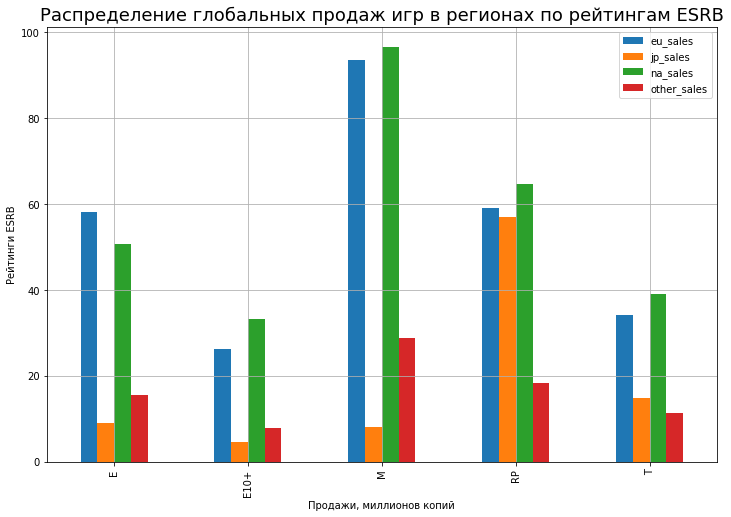

In [45]:
data_region_rating.plot.bar(figsize=(12, 8))
plt.title('Распределение глобальных продаж игр в регионах по рейтингам ESRB', fontsize=18)
plt.xlabel('Продажи, миллионов копий')
plt.ylabel('Рейтинги ESRB')
plt.grid()
plt.show()

В Северной Америке и Европе рейтинг `ESRB` оказывает заметное влияние на продажи игр: заметно больше остальных продажи в группах игр `M` (для взрослых), меньше в группах `RP` (без рейтинга) и `E` (для всех). В группах `E10+` (для детей с 10 лет) и `T` (для подростков) ещё меньше. В Японии самое большое число продаваемых игр без рейтинга.

Посмотрим на частотность использования всех категорий рейтинга.

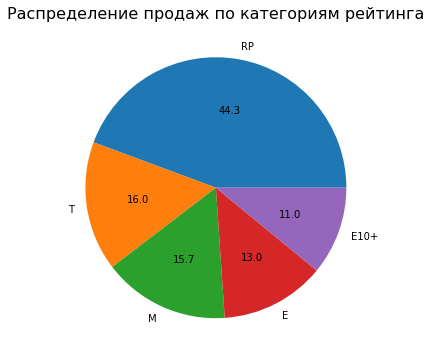

In [46]:
fig = plt.figure(figsize=(10, 6))
data_actual['rating'].value_counts().plot.pie(autopct='%.1f')
plt.title('Распределение продаж по категориям рейтинга', fontsize=16)
plt.ylabel('')
plt.show()

Очень много игр без рейтинга (44 %). Остальные категории распределились примерно в равных пропорциях. Объединим в категорию `для взрослых и подростков` группы `M` и `T` и в категорию `для всех` группы `E` и `E10+`. Если рейтинг не определён (группа `RP`), эти игры также можно отнести в категорию `для всех`.

In [47]:
data_region_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,58.06,8.94,50.74,15.39
E10+,26.16,4.46,33.23,7.83
M,93.44,8.01,96.42,28.67
RP,58.95,56.90,64.72,18.40
T,34.07,14.78,38.95,11.33


In [48]:
data_region_rating.loc['everyone'] = data_region_rating.loc[['E', 'E10+', 'RP']].sum(axis = 0)
data_region_rating.loc['adult'] = data_region_rating.loc[['M', 'T']].sum(axis = 0)
data_region_rating_2 = data_region_rating.query('rating == "adult" or rating == "everyone"')
data_region_rating_2

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
everyone,143.17,70.30,148.69,41.62
adult,127.51,22.79,135.37,40.00


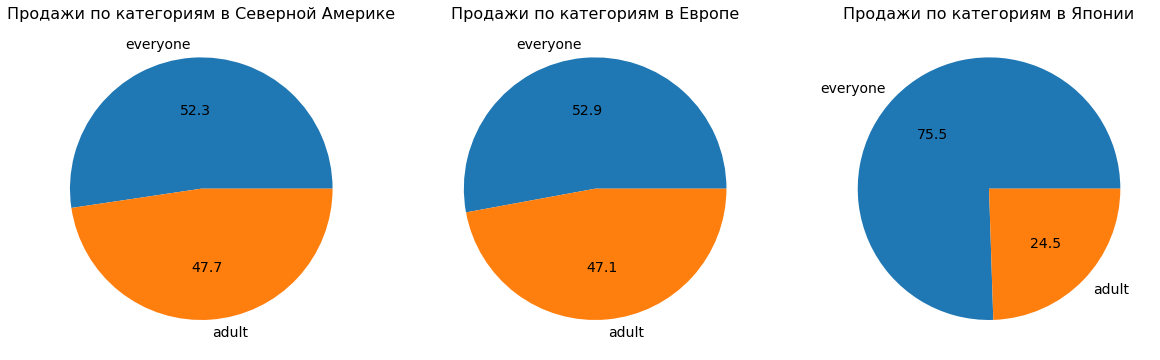

In [49]:
plt.subplot(131)
data_region_rating_2['na_sales'].plot.pie(autopct='%.1f', figsize=(20, 20), fontsize=14)
plt.title('Продажи по категориям в Северной Америке', fontsize=16)                      
plt.ylabel('')
plt.subplot(132)
data_region_rating_2['eu_sales'].plot.pie(autopct='%.1f', figsize=(20, 20), fontsize=14)
plt.title('Продажи по категориям в Европе', fontsize=16)                      
plt.ylabel('')
plt.subplot(133)
data_region_rating_2['jp_sales'].plot.pie(autopct='%.1f', figsize=(20, 20), fontsize=14)
plt.title('Продажи по категориям в Японии', fontsize=16)                      
plt.ylabel('')
plt.show()

Как видно из круговых диаграмм, игры "для всех" в Америке и Европе имеют примерно равную долю в продажах с играми "для взрослых и подростков", а в Японии доля игр "для взрослых и подростков" составляет всего четверть от общих продаж, а остальные три четверти составляют игры "для всех".

**Вывод.** Портрет пользователя в Японии сильно отличается от портрета пользователя в Северной Америке и Европе.  
Пользователь в Японии предпочитает платформу `3DS`, жанр `Role-Playing` или `Action`, игры для всех возрастных категорий.
Пользователь в Северной Америке и Европе предпочитает платформу `PS4` или `XOne`, жанр `Action` или `Shooter`, а возрастной рейтинг игр 50 на 50 распределяется между взрослыми и детскими играми.

## Проверка гипотез
### О средних рейтингах платформ

Рассмотрим пользовательские рейтинги платформ `XboxOne` и `PC`. Сравним в таблице `data_actual` данные столбца `user_score` для этих платформ.  
Предварительно проверим столбец `user_score` на наличие пропущенных значений, удалим их и поменяем тип данных на `float`.

In [50]:
print('Количество пропущенных значений', data_actual['user_score'].isna().sum())

Количество пропущенных значений 801


In [51]:
data_clean = data_actual.dropna(subset=['user_score'])
data_clean['user_score'].isna().sum()

0

In [52]:
data_clean_2 = data_clean.copy()
data_clean_2['user_score'] = data_clean_2['user_score'].astype('float')
data_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    Int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           888 non-null    object 
 11  total_sales      888 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 91.9+ KB


In [53]:
data_clean_2['platform'].value_counts()

ps4     242
xone    165
pc      122
ps3      98
x360     83
psv      73
3ds      55
wiiu     48
wii       2
Name: platform, dtype: int64

Имеются две выборки, взятые независимо друг от друга из двух генеральных совокупностей

Найдём выборочные средние

In [54]:
score_xone = data_clean_2.query('platform == "xone"')['user_score']
score_pc = data_clean_2.query('platform == "pc"')['user_score']
print(f'Средний рейтинг для XOne: {np.mean(score_xone):.3f}')
print(f'Средний рейтинг для PC: {np.mean(score_pc):.3f}')

Средний рейтинг для XOne: 6.595
Средний рейтинг для PC: 6.298


Сформулируем гипотезы: 

Н0: средний пользовательский рейтинг платформы `XboxOne` равен среднему пользовательскому рейтингу платформы `PC`. 

Н1: средний пользовательский рейтинг платформы `XboxOne` не равен среднему пользовательскому рейтингу платформы `PC`.

In [55]:
#Уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    score_xone,
    score_pc
)

#Выведем полученное p-value
print(f'p-значение: {results.pvalue:.3f}')

#Вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.105
Не получилось отвергнуть нулевую гипотезу


Средний пользовательский рейтинг для платформы `XboxOne` равен 65,94545, для платформы `PC` - 62,98361. 
Средний пользовательский рейтинг для двух платформ по выборкам мы получили разный, различие между ними 3 единицы. Полученное значение p-value говорит о том, что с вероятностью в 10 % такое или большее различие можно получить случайно.

**Общий вывод:** С большей долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статически значимых отличий

### О средних рейтингах жанров

Рассмотрим пользовательские рейтинги жанров `Action` и `Sports`. Сравним в таблице data_actual данные столбца user_score для этих жанров.

In [56]:
score_action = data_clean_2.query('genre == "Action"')['user_score']
score_sports = data_clean_2.query('genre == "Sports"')['user_score']

print(f'Средний рейтинг для Action: {np.mean(score_action):.3f}')
print(f'Средний рейтинг для Sports: {np.mean(score_sports):.3f}')

Средний рейтинг для Action: 6.761
Средний рейтинг для Sports: 5.225


Сформулируем гипотезы:

Н0: средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports`. 

Н1: средний пользовательский рейтинг жанра `Action` не равен среднему пользовательскому рейтингу жанра `Sports`.

In [57]:
alpha = 0.05

results = st.ttest_ind(
    score_action,
    score_sports
)

#Выведем полученное p-value
print('p-значение:', results.pvalue)

#Вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


p-значение  2.871114798510669e-19 означает очень маленькое число (умноженное на 10 в минус 19 степени, и это число значительно меньше заданного уровня значимости. Средний пользовательский рейтинг жанра `Action` по выборке мы получили 67,60606, а жанра `Sports` - 52,25197. Средние рейтинги разные. Полученное значение p-value говорит о том, что с очень маленькой, почти равной нулю вероятностью такое или большее различие средних в генеральной совокупности можно получить случайно. То есть такое или большее различие может быть получено практически в 100 процентах случаев. Итак, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов игр в жанре `Action` и в жанре `Sports`, и не отвергаем альтернативную гипотезу о том, что средние пользовательские рейтинги в этих жанрах разные.

В качестве нулевой гипотезы чаще всего выбирают гипотезу о равенстве параметра генеральной совокупности какому-то числу, а в качестве альтернативной гипотезы уже выбирают один из вариантов `не равен`, `больше` или `меньше`. Поэтому и в первом, и во втором случаях мы в качестве нулевой гипотезы выбрали гипотезу о том, что средний пользовательский рейтинг одной платформы (жанра) равен среднему пользовательскому рейтингу другой платформы (жанра). В качестве альтернативной гипотезы принимаем гипотезу о том, что средние пользовательские рейтинги не равны.  
Для проверки гипотезы применили двухвыборочный t-тест для независимых выборок, так как пользовательский рейтинг для разных платформ и для разных жанров не зависит друг от друга. Использован метод `ttest_ind`. Этот метод принимает выборки разного размера. Дисперсии предполагаются равными, поэтому аргумент `equal_var` не указывали.

## Общий вывод

Исходные данные загружены, прочитаны и изучена общая информация о них. Исходные данные состоят из одной таблицы, в которой имеются пропущенные значения, названия столбцов требуют стилистической коррекции.  
Выполнена предобработка данных: названия колонок приведены в змеиный регистр, оценки критиков и пользователей приведены к сопоставимому виду, типы данных изменены на целочисленные в столбцах `year_of_release`, `critic_score` и `user_score`, пропущенные значения удалены только в столбцах `name` и `genre`, в столбце `rating` выполнили замену пропущенных значений константой, в других столбцах пропущенные значения оставлены.  
До 1995 года игр выпускалось мало, интерес для исследования представляет период с 1995 года.  
Характерный срок, за который появляются и исчезают платформы, составляет примерно 10 лет. Первые 4-5 лет продажи новых платформ держатся на высоком уровне, затем постепенно снижаются, и примерно на 10-й год они опускаются практически до нуля.  
Далее мы выбрали актуальный период с 2014 по 2016 гг., и далее анализировали данные именно в этот период.  
Потенциально прибыльными платформами можно считать `PS4`, `XOne`, `3DS`, `PC`, `WiiU`, `PSV`.  
Отзывы пользователей не оказывают влияния на глобальные продажи игр, а между отзывами критиков и продажами игр отмечено присутствие прямой зависимости, хоть и слабой.  
Судя по оценкам критиков, выбранные нами платформы, действительно, являются перспективными.  
Распределение продаж по жанрам несимметричное. Самые прибыльные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Platform`, `Simulation`.
Портрет пользователя в Японии сильно отличается от портрета пользователя в Северной Америке и Европе.
Пользователь в Японии предпочитает платформу 3DS, жанр Role-Playing или Action, игры для всех возрастных категорий. Пользователь в Северной Америке и Европе предпочитает платформу PS4 или XOne, жанр Action или Shooter, а возрастной рейтинг игр 50 на 50 распределяется между взрослыми и детскими играми.

Таким образом платформа `PS4` является самой популярной в мире; `3DS` также в топ-5 во всём мире, а в Японии её доля составляет почти половину рынка; `PS3` по-прежнему популярна во всём мире, удерживается в топ-5 во всех регионах. На платформы `XOne`, `X360`, `PC`, `PSV`, `WiiU` также можно рассчитывать в плане прибыльности.
`Action` - самый популярный жанр в мире, он и `Shooter`, `Role-Playing`, `Sports` - основные жанры, на которые нужно делать акцент в формировании ассортимента игр. Кроме того, необходимо присутствие таких жанров как `Misc`, `Racing`, `Fighting`.

Средний пользовательский рейтинг для платформы XboxOne равен 65.95, для платформы PC - 62.98. Гипотезу о равенстве средних пользовательских рейтингов для этих платформ мы не отвергаем.  
Средний пользовательский рейтинг жанра `Action` по выборке мы получили 67.61, а жанра `Sports` - 52.25. Гипотезу о том, что средние пользовательские рейтинги в этих жанрах разные, мы не отвергаем.

Итак, исследование показало, что самыми потенциально прибыльными платформами являются `PS4`, `XOne`, `3DS`, `PC`, `WiiU`, `PSV`. Самые прибыльные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`, `Racing`, `Fighting`. Ассортимент игр следует увеличивать именно по этим платформам и этим жанрам. Продажи игр в Японии следует продвигать по платформам `3DS`, `PS4`, `PSV`, `PS3`, `WiiU` и по жанрам `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`. В остальных регионах следует продавать игры на платформах  `PS4`, `PS3`, `XOne`, `X360`,`PC`, `3DS` и в жанрах `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`, `Misc`. В Японии наибольшим спросом пользуются игры без возрастных ограничений, то есть для всех, в Европе и Америке все возрастные категории игр востребованы.